# 정규화(원핫 인코딩 + 표준화)
## plant 데이터 prepocessing

In [76]:
import pandas as pd
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import module.etl as etl
from sklearn.metrics import roc_auc_score
pd.options.display.max_columns = 999

In [77]:
plant = pd.read_csv("data/31.finaldata_plant/new_plant.csv")
plant

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,DEW_POINT_IN,MONTH,WEEK,HOUR,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM
0,2016-04-01 00:00:00,1,1,16.00,24.00,11.00,9.00,42.00,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-4.561169,4,13,0,1013.3,1016.0,0.0,7.750,0.475,0.900,128.30,1.200,142.725,143.0,2.0,2.6,1015.5,72.0,8.4,0.0,0.0,78.0,0.8,60.0,4.0,9.0,1015.7,55.0
1,2016-04-01 00:00:00,1,2,14.00,23.00,11.00,9.00,42.00,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-6.805218,4,13,0,1013.3,1016.0,0.0,7.750,0.475,0.900,128.30,1.200,142.725,143.0,2.0,2.6,1015.5,72.0,8.4,0.0,0.0,78.0,0.8,60.0,4.0,9.0,1015.7,55.0
2,2016-04-01 00:00:00,1,3,13.00,32.00,10.00,9.00,42.00,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-3.309370,4,13,0,1013.3,1016.0,0.0,7.750,0.475,0.900,128.30,1.200,142.725,143.0,2.0,2.6,1015.5,72.0,8.4,0.0,0.0,78.0,0.8,60.0,4.0,9.0,1015.7,55.0
3,2016-04-01 03:00:00,1,1,14.00,28.00,10.00,7.00,59.00,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,-4.222123,4,13,3,1012.2,1014.9,0.0,5.625,0.525,0.975,164.25,1.500,142.750,23.0,6.0,7.7,1022.9,52.0,6.3,0.0,0.0,228.0,0.3,10.0,4.0,9.8,1015.0,44.0
4,2016-04-01 03:00:00,1,2,12.00,32.00,9.00,7.00,59.00,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,-4.183719,4,13,3,1012.2,1014.9,0.0,5.625,0.525,0.975,164.25,1.500,142.750,23.0,6.0,7.7,1022.9,52.0,6.3,0.0,0.0,228.0,0.3,10.0,4.0,9.8,1015.0,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349116,2019-03-31 23:40:00,2,2,9.02,38.49,9.68,4.47,53.14,2019-04-01 23:40:00,0.0,2019-04-02 23:40:00,0.0,-4.368462,3,13,23,1021.1,1023.6,0.0,3.500,2.725,3.375,287.70,5.775,298.125,335.0,8.0,10.3,1023.7,57.0,5.6,2.0,0.0,299.0,8.2,313.0,14.0,5.0,1023.2,46.0
349117,2019-03-31 23:40:00,2,3,8.26,39.62,9.57,4.47,53.14,2019-04-01 23:40:00,0.0,2019-04-02 23:40:00,0.0,-4.666200,3,13,23,1021.1,1023.6,0.0,3.500,2.725,3.375,287.70,5.775,298.125,335.0,8.0,10.3,1023.7,57.0,5.6,2.0,0.0,299.0,8.2,313.0,14.0,5.0,1023.2,46.0
349118,2019-03-31 23:50:00,1,1,10.49,38.74,10.52,6.34,45.94,2019-04-01 23:50:00,0.0,2019-04-02 23:50:00,0.0,-2.967238,3,13,23,1021.1,1023.6,0.0,3.500,2.725,3.375,287.70,5.775,298.125,335.0,8.0,10.3,1023.7,57.0,5.6,2.0,0.0,299.0,8.2,313.0,14.0,5.0,1023.2,46.0
349119,2019-03-31 23:50:00,1,2,10.55,36.69,11.01,6.34,45.94,2019-04-01 23:50:00,0.0,2019-04-02 23:50:00,0.0,-3.641345,3,13,23,1021.1,1023.6,0.0,3.500,2.725,3.375,287.70,5.775,298.125,335.0,8.0,10.3,1023.7,57.0,5.6,2.0,0.0,299.0,8.2,313.0,14.0,5.0,1023.2,46.0


## 정규화 할 list 나누기

In [78]:
dummy_list = ["MONTH","WEEK"]
caling_list= ["DEW_POINT_IN", "AVG_PA", "AVG_PS", "HR1_RN", "AVG_TA", "AVG_WS", "MAX_WS", "MAX_WS_WD", "MAX_INS_WS", "MAX_INS_WS_WD", "WD_N1", "WS_N1", "GUST_WS_N1", "PA", "BUOY_HM", "BUOY_TA", "MAX_WH", "AVG_WH", "LB_WD", "LB_WS", "LB_MAX_INS_WD", "LB_MAX_IWS", "LB_TA", "LB_PS", "LB_HM"]

In [79]:
plant = etl.preprosess(plant, caling_list, dummy_list)
plant.head()

caling_category: ['TEM_IN', 'HUM_IN', 'TEM_COIL', 'TEM_OUT_LOC1', 'HUM_OUT_LOC1', 'DEW_POINT_IN', 'AVG_PA', 'AVG_PS', 'HR1_RN', 'AVG_TA', 'AVG_WS', 'MAX_WS', 'MAX_WS_WD', 'MAX_INS_WS', 'MAX_INS_WS_WD', 'WD_N1', 'WS_N1', 'GUST_WS_N1', 'PA', 'BUOY_HM', 'BUOY_TA', 'MAX_WH', 'AVG_WH', 'LB_WD', 'LB_WS', 'LB_MAX_INS_WD', 'LB_MAX_IWS', 'LB_TA', 'LB_PS', 'LB_HM']
dummy_category: ['PLANT', 'LOC', 'MONTH', 'WEEK']


,MEA_DDHR,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,HOUR,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,DEW_POINT_IN,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM,PLANT_1,PLANT_2,LOC_1,LOC_2,LOC_3,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12,WEEK_1,WEEK_2,WEEK_3,WEEK_4,WEEK_5,WEEK_6,WEEK_7,WEEK_8,WEEK_9,WEEK_10,WEEK_11,WEEK_12,WEEK_13,WEEK_14,WEEK_15,WEEK_16,WEEK_17,WEEK_18,WEEK_19,WEEK_20,WEEK_21,WEEK_22,WEEK_23,WEEK_24,WEEK_25,WEEK_26,WEEK_27,WEEK_28,WEEK_29,WEEK_30,WEEK_31,WEEK_32,WEEK_33,WEEK_34,WEEK_35,WEEK_36,WEEK_37,WEEK_38,WEEK_39,WEEK_40,WEEK_41,WEEK_42,WEEK_43,WEEK_44,WEEK_45,WEEK_46,WEEK_47,WEEK_48,WEEK_49,WEEK_50,WEEK_51,WEEK_52
0,2016-04-01 00:00:00,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,0,-0.036246,-2.057490,-0.486257,-0.416384,-1.060814,-0.948350,-0.230294,-0.212185,-0.14778,-0.371876,-1.241646,-1.255892,-0.964093,-1.340759,-0.751565,-0.429030,-0.748825,-0.860236,-0.297434,-0.038294,-0.36338,-0.62792,-0.278967,-1.170469,-1.281827,-1.298275,-1.091939,-0.276946,-0.247652,-0.805385,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2016-04-01 00:00:00,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,0,-0.236765,-2.129652,-0.486257,-0.416384,-1.060814,-1.145321,-0.230294,-0.212185,-0.14778,-0.371876,-1.241646,-1.255892,-0.964093,-1.340759,-0.751565,-0.429030,-0.748825,-0.860236,-0.297434,-0.038294,-0.36338,-0.62792,-0.278967,-1.170469,-1.281827,-1.298275,-1.091939,-0.276946,-0.247652,-0.805385,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2016-04-01 00:00:00,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,0,-0.337024,-1.480191,-0.585175,-0.416384,-1.060814,-0.838474,-0.230294,-0.212185,-0.14778,-0.371876,-1.241646,-1.255892,-0.964093,-1.340759,-0.751565,-0.429030,-0.748825,-0.860236,-0.297434,-0.038294,-0.36338,-0.62792,-0.278967,-1.170469,-1.281827,-1.298275,-1.091939,-0.276946,-0.247652,-0.805385,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2016-04-01 03:00:00,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,3,-0.236765,-1.768841,-0.585175,-0.596885,-0.155582,-0.918590,-0.357164,-0.338487,-0.14778,-0.561006,-1.201096,-1.201016,-0.482049,-1.203354,-0.751222,-1.465896,0.673198,0.414358,0.556751,-1.201866,-0.59900,-0.62792,-0.278967,0.213674,-1.450263,-1.739603,-1.091939,-0.197241,-0.328442,-1.413542,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2016-04-01 03:00:00,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,3,-0.437283,-1.480191,-0.684093,-0.596885,-0.155582,-0.915219,-0.357164,-0.338487,-0.14778,-0.561006,-1.201096,-1.201016,-0.482049,-1.203354,-0.751222,-1.465896,0.673198,0.414358,0.556751,-1.201866,-0.59900,-0.62792,-0.278967,0.213674,-1.450263,-1.739603,-1.091939,-0.197241,-0.328442,-1.413542,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## test_data validation &정규화 preprosessing

In [80]:
test_data = pd.read_csv("data/31.finaldata_plant/test_weather_sea.csv")
test_data

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,DEW_POINT_IN,MONTH,WEEK,HOUR,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM
0,2019-04-01 00:00:00,2,3,8.17,40.42,10.10,4.20,54.82,2019-04-02 00:00:00,NaN,2019-04-03 00:00:00,NaN,-4.482439,4,14,0,1021.200000,1023.7,0.0,3.150000,2.125000,2.550,269.325000,4.250000,283.350000,336.0,7.0,9.9,1023.8,57.0,5.4,2.0,0.0,298.0,7.6,313.0,14.0,5.0,1023.2,50.0
1,2019-04-01 04:30:00,1,2,10.03,48.81,10.79,6.09,59.34,2019-04-02 04:30:00,NaN,2019-04-03 04:30:00,NaN,-0.247107,4,14,4,1021.633333,1024.1,0.0,4.958333,2.791667,3.275,288.208333,5.533333,274.216667,346.0,6.0,8.3,1023.1,64.0,5.3,1.0,0.0,305.0,6.9,300.0,9.0,5.0,1022.9,62.0
2,2019-04-01 10:30:00,2,3,9.45,40.93,9.07,12.26,32.14,2019-04-02 10:30:00,NaN,2019-04-03 10:30:00,NaN,-3.163210,4,14,10,1022.066667,1024.5,0.0,6.766667,3.458333,4.000,307.091667,6.816667,265.083333,11.0,3.0,4.0,1025.3,65.0,6.0,1.0,0.0,326.0,4.5,300.0,9.0,5.4,1025.0,47.0
3,2019-04-01 11:00:00,1,1,12.32,34.13,10.86,12.32,28.27,2019-04-02 11:00:00,NaN,2019-04-03 11:00:00,NaN,-3.042714,4,14,11,1022.500000,1024.9,0.0,8.575000,4.125000,4.725,325.975000,8.100000,255.950000,27.0,2.0,3.3,1025.2,65.0,6.1,1.0,0.0,325.0,3.3,300.0,9.0,5.6,1024.9,46.0
4,2019-04-01 13:30:00,2,1,11.28,22.65,8.76,12.01,19.84,2019-04-02 13:30:00,NaN,2019-04-03 13:30:00,NaN,-9.291221,4,14,13,1021.100000,1023.5,0.0,8.837500,4.075000,4.775,304.662500,7.850000,279.862500,272.0,2.0,4.0,1024.0,58.0,6.3,0.0,0.0,227.0,3.1,300.0,9.0,6.1,1023.6,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,2020-03-29 03:00:00,1,2,10.73,33.36,13.30,6.28,46.37,2020-03-30 03:00:00,NaN,2020-03-31 03:00:00,NaN,-4.745901,3,13,3,1020.500000,1023.0,0.0,1.450000,1.225000,1.400,252.425000,2.175000,263.025000,23.0,6.0,7.7,1022.9,52.0,6.3,0.0,0.0,345.0,4.2,338.0,8.0,4.8,1022.9,46.0
3535,2020-03-29 05:00:00,2,3,9.15,38.86,11.70,1.39,74.33,2020-03-30 05:00:00,NaN,2020-03-31 05:00:00,NaN,-4.125121,3,13,5,1020.700000,1023.2,0.0,0.175000,0.875000,1.225,163.250000,1.525000,184.275000,15.0,6.0,8.2,1022.9,52.0,6.3,0.0,0.0,5.0,3.5,338.0,8.0,4.2,1023.2,50.0
3536,2020-03-29 07:00:00,2,1,7.10,44.87,9.03,4.26,58.06,2020-03-30 07:00:00,NaN,2020-03-31 07:00:00,NaN,-4.064845,3,13,7,1021.300000,1023.8,0.0,-0.500000,1.200000,1.650,179.450000,2.375000,170.900000,23.0,6.0,7.7,1022.9,52.0,6.3,0.0,0.0,29.0,3.3,338.0,8.0,3.9,1023.9,46.0
3537,2020-03-29 11:30:00,1,1,13.54,33.49,12.20,12.90,33.67,2020-03-30 11:30:00,NaN,2020-03-31 11:30:00,NaN,-2.224313,3,13,11,1021.300000,1023.8,0.0,-0.500000,1.200000,1.650,179.450000,2.375000,170.900000,23.0,6.0,7.7,1022.9,52.0,6.3,0.0,0.0,149.0,0.9,338.0,8.0,7.2,1023.6,49.0


In [81]:
test = etl.preprosess(test_data,caling_list,dummy_list)
test.head()

caling_category: ['TEM_IN', 'HUM_IN', 'TEM_COIL', 'TEM_OUT_LOC1', 'HUM_OUT_LOC1', 'DEW_POINT_IN', 'AVG_PA', 'AVG_PS', 'HR1_RN', 'AVG_TA', 'AVG_WS', 'MAX_WS', 'MAX_WS_WD', 'MAX_INS_WS', 'MAX_INS_WS_WD', 'WD_N1', 'WS_N1', 'GUST_WS_N1', 'PA', 'BUOY_HM', 'BUOY_TA', 'MAX_WH', 'AVG_WH', 'LB_WD', 'LB_WS', 'LB_MAX_INS_WD', 'LB_MAX_IWS', 'LB_TA', 'LB_PS', 'LB_HM']
dummy_category: ['PLANT', 'LOC', 'MONTH', 'WEEK']


,MEA_DDHR,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,HOUR,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,DEW_POINT_IN,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM,PLANT_1,PLANT_2,LOC_1,LOC_2,LOC_3,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12,WEEK_1,WEEK_2,WEEK_3,WEEK_4,WEEK_5,WEEK_6,WEEK_7,WEEK_8,WEEK_9,WEEK_10,WEEK_11,WEEK_12,WEEK_13,WEEK_14,WEEK_15,WEEK_16,WEEK_17,WEEK_18,WEEK_19,WEEK_20,WEEK_21,WEEK_22,WEEK_23,WEEK_24,WEEK_25,WEEK_26,WEEK_27,WEEK_28,WEEK_29,WEEK_30,WEEK_31,WEEK_32,WEEK_33,WEEK_34,WEEK_35,WEEK_36,WEEK_37,WEEK_38,WEEK_39,WEEK_40,WEEK_41,WEEK_42,WEEK_43,WEEK_44,WEEK_45,WEEK_46,WEEK_47,WEEK_48,WEEK_49,WEEK_50,WEEK_51,WEEK_52
0,2019-04-01 00:00:00,2019-04-02 00:00:00,NaN,2019-04-03 00:00:00,NaN,0,-0.936761,-1.054636,-0.641253,-1.016510,-0.547359,-1.156985,0.719168,0.728424,-0.201451,-0.982463,0.193810,0.036838,1.217634,0.138219,1.473462,1.421462,1.080957,1.183797,0.735323,-1.467916,-0.912763,3.380703,-0.16337,0.963194,1.217574,1.039870,1.535735,-0.821423,0.687035,-1.459530,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2019-04-01 04:30:00,2019-04-02 04:30:00,NaN,2019-04-03 04:30:00,NaN,4,-0.720865,-0.449353,-0.562858,-0.817131,-0.319514,-0.722579,0.770127,0.774986,-0.201451,-0.787520,0.786256,0.619294,1.489210,0.775478,1.341007,1.513584,0.720434,0.723386,0.653443,-0.960107,-0.925726,1.467332,-0.16337,1.026285,0.963700,0.923601,0.243787,-0.821423,0.651951,-0.669360,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2019-04-01 10:30:00,2019-04-02 10:30:00,NaN,2019-04-03 10:30:00,NaN,10,-0.788188,-1.017843,-0.758277,-0.166248,-1.690616,-1.021676,0.821087,0.821548,-0.201451,-0.592578,1.378701,1.201750,1.760786,1.412737,1.208552,-1.572493,-0.361134,-0.513971,0.910781,-0.887563,-0.834982,1.467332,-0.16337,1.215556,0.093277,0.923601,0.243787,-0.776169,0.897540,-1.657072,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2019-04-01 11:00:00,2019-04-02 11:00:00,NaN,2019-04-03 11:00:00,NaN,11,-0.455058,-1.508418,-0.554905,-0.159918,-1.885695,-1.009317,0.872047,0.868110,-0.201451,-0.397635,1.971147,1.784207,2.032362,2.049996,1.076097,-1.425098,-0.721656,-0.715401,0.899084,-0.887563,-0.822018,1.467332,-0.16337,1.206543,-0.341934,0.923601,0.243787,-0.753542,0.885845,-1.722919,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2019-04-01 13:30:00,2019-04-02 13:30:00,NaN,2019-04-03 13:30:00,NaN,13,-0.575774,-2.336624,-0.793497,-0.192621,-2.310636,-1.650210,0.707408,0.705143,-0.201451,-0.369337,1.926714,1.824376,1.725850,1.925855,1.422885,0.831883,-0.721656,-0.513971,0.758718,-1.395372,-0.796091,-0.446039,-0.16337,0.323276,-0.414470,0.923601,0.243787,-0.696975,0.733814,-2.249699,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# 데이터 분류
## plant_train 데이터
### train, test 데이터 분리

In [82]:
timeList = ['MEA_DDHR', 'X24H_TMA', 'X48H_TMA']
plant = plant.drop(timeList, axis=1)

In [83]:
plant.head()

,X24H_COND_LOC,X48H_COND_LOC,HOUR,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,DEW_POINT_IN,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM,PLANT_1,PLANT_2,LOC_1,LOC_2,LOC_3,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12,WEEK_1,WEEK_2,WEEK_3,WEEK_4,WEEK_5,WEEK_6,WEEK_7,WEEK_8,WEEK_9,WEEK_10,WEEK_11,WEEK_12,WEEK_13,WEEK_14,WEEK_15,WEEK_16,WEEK_17,WEEK_18,WEEK_19,WEEK_20,WEEK_21,WEEK_22,WEEK_23,WEEK_24,WEEK_25,WEEK_26,WEEK_27,WEEK_28,WEEK_29,WEEK_30,WEEK_31,WEEK_32,WEEK_33,WEEK_34,WEEK_35,WEEK_36,WEEK_37,WEEK_38,WEEK_39,WEEK_40,WEEK_41,WEEK_42,WEEK_43,WEEK_44,WEEK_45,WEEK_46,WEEK_47,WEEK_48,WEEK_49,WEEK_50,WEEK_51,WEEK_52
0,0.0,0.0,0,-0.036246,-2.057490,-0.486257,-0.416384,-1.060814,-0.948350,-0.230294,-0.212185,-0.14778,-0.371876,-1.241646,-1.255892,-0.964093,-1.340759,-0.751565,-0.429030,-0.748825,-0.860236,-0.297434,-0.038294,-0.36338,-0.62792,-0.278967,-1.170469,-1.281827,-1.298275,-1.091939,-0.276946,-0.247652,-0.805385,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0,-0.236765,-2.129652,-0.486257,-0.416384,-1.060814,-1.145321,-0.230294,-0.212185,-0.14778,-0.371876,-1.241646,-1.255892,-0.964093,-1.340759,-0.751565,-0.429030,-0.748825,-0.860236,-0.297434,-0.038294,-0.36338,-0.62792,-0.278967,-1.170469,-1.281827,-1.298275,-1.091939,-0.276946,-0.247652,-0.805385,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0,-0.337024,-1.480191,-0.585175,-0.416384,-1.060814,-0.838474,-0.230294,-0.212185,-0.14778,-0.371876,-1.241646,-1.255892,-0.964093,-1.340759,-0.751565,-0.429030,-0.748825,-0.860236,-0.297434,-0.038294,-0.36338,-0.62792,-0.278967,-1.170469,-1.281827,-1.298275,-1.091939,-0.276946,-0.247652,-0.805385,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,3,-0.236765,-1.768841,-0.585175,-0.596885,-0.155582,-0.918590,-0.357164,-0.338487,-0.14778,-0.561006,-1.201096,-1.201016,-0.482049,-1.203354,-0.751222,-1.465896,0.673198,0.414358,0.556751,-1.201866,-0.59900,-0.62792,-0.278967,0.213674,-1.450263,-1.739603,-1.091939,-0.197241,-0.328442,-1.413542,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,3,-0.437283,-1.480191,-0.684093,-0.596885,-0.155582,-0.915219,-0.357164,-0.338487,-0.14778,-0.561006,-1.201096,-1.201016,-0.482049,-1.203354,-0.751222,-1.465896,0.673198,0.414358,0.556751,-1.201866,-0.59900,-0.62792,-0.278967,0.213674,-1.450263,-1.739603,-1.091939,-0.197241,-0.328442,-1.413542,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [84]:
train_X = plant.drop(['X24H_COND_LOC', 'X48H_COND_LOC'], axis=1)
train_y = plant[['X24H_COND_LOC', 'X48H_COND_LOC']]

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_X,train_y, test_size=0.3, shuffle=True, random_state=42, stratify=train_y)

In [86]:
y_train24 = y_train[['X24H_COND_LOC']]
y_train48 = y_train[['X48H_COND_LOC']]
y_val24 = y_val[['X24H_COND_LOC']]
y_val48 = y_val[['X48H_COND_LOC']]

In [87]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled24, y_resampled24 = smote.fit_sample(X_train, y_train24)

In [88]:
X_resampled24.shape, y_resampled24

((486272, 100),         X24H_COND_LOC
 0                 0.0
 1                 0.0
 2                 0.0
 3                 0.0
 4                 0.0
 ...               ...
 486267            1.0
 486268            1.0
 486269            1.0
 486270            1.0
 486271            1.0
 
 [486272 rows x 1 columns])

In [89]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled48, y_resampled48 = smote.fit_sample(X_train, y_train48)

In [90]:
X_resampled48.shape, y_resampled48

((486030, 100),         X48H_COND_LOC
 0                 0.0
 1                 0.0
 2                 0.0
 3                 0.0
 4                 0.0
 ...               ...
 486025            1.0
 486026            1.0
 486027            1.0
 486028            1.0
 486029            1.0
 
 [486030 rows x 1 columns])

## test_data 만들기

In [69]:
timeList = ['MEA_DDHR', 'X24H_TMA', 'X48H_TMA']
test = test.drop(timeList, axis=1)
test_X = test.drop(['X24H_COND_LOC', 'X48H_COND_LOC'], axis=1)
test24_y = test[['X24H_COND_LOC']]
test48_y = test[['X48H_COND_LOC']]

# Random Forest
## 24 시간 결로 예측

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf_model24 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model24.fit(X_train24, y_train24)

C:\Users\B0110\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [14]:
y_pred24 = rf_model24.predict(X_val24)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred24))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104223
         1.0       0.91      0.75      0.82       514

    accuracy                           1.00    104737
   macro avg       0.96      0.88      0.91    104737
weighted avg       1.00      1.00      1.00    104737



떨어짐

In [15]:
imp_rf24_df = pd.DataFrame(data=np.c_[train_X.columns.values, rf_model24.feature_importances_], columns=['variable', 'importance'])
imp_rf24_df.sort_values(by='importance', ascending=False, inplace=True)

In [16]:
imp_rf24_df.head(30)

,variable,importance
2,TEM_COIL,0.071
1,HUM_IN,0.0510406
0,TEM_IN,0.0468011
5,DEW_POINT_IN,0.0420236
20,BUOY_TA,0.041498
9,AVG_TA,0.0410089
27,LB_TA,0.0374438
25,LB_MAX_INS_WD,0.0371581
4,HUM_OUT_LOC1,0.0355253
3,TEM_OUT_LOC1,0.0342482


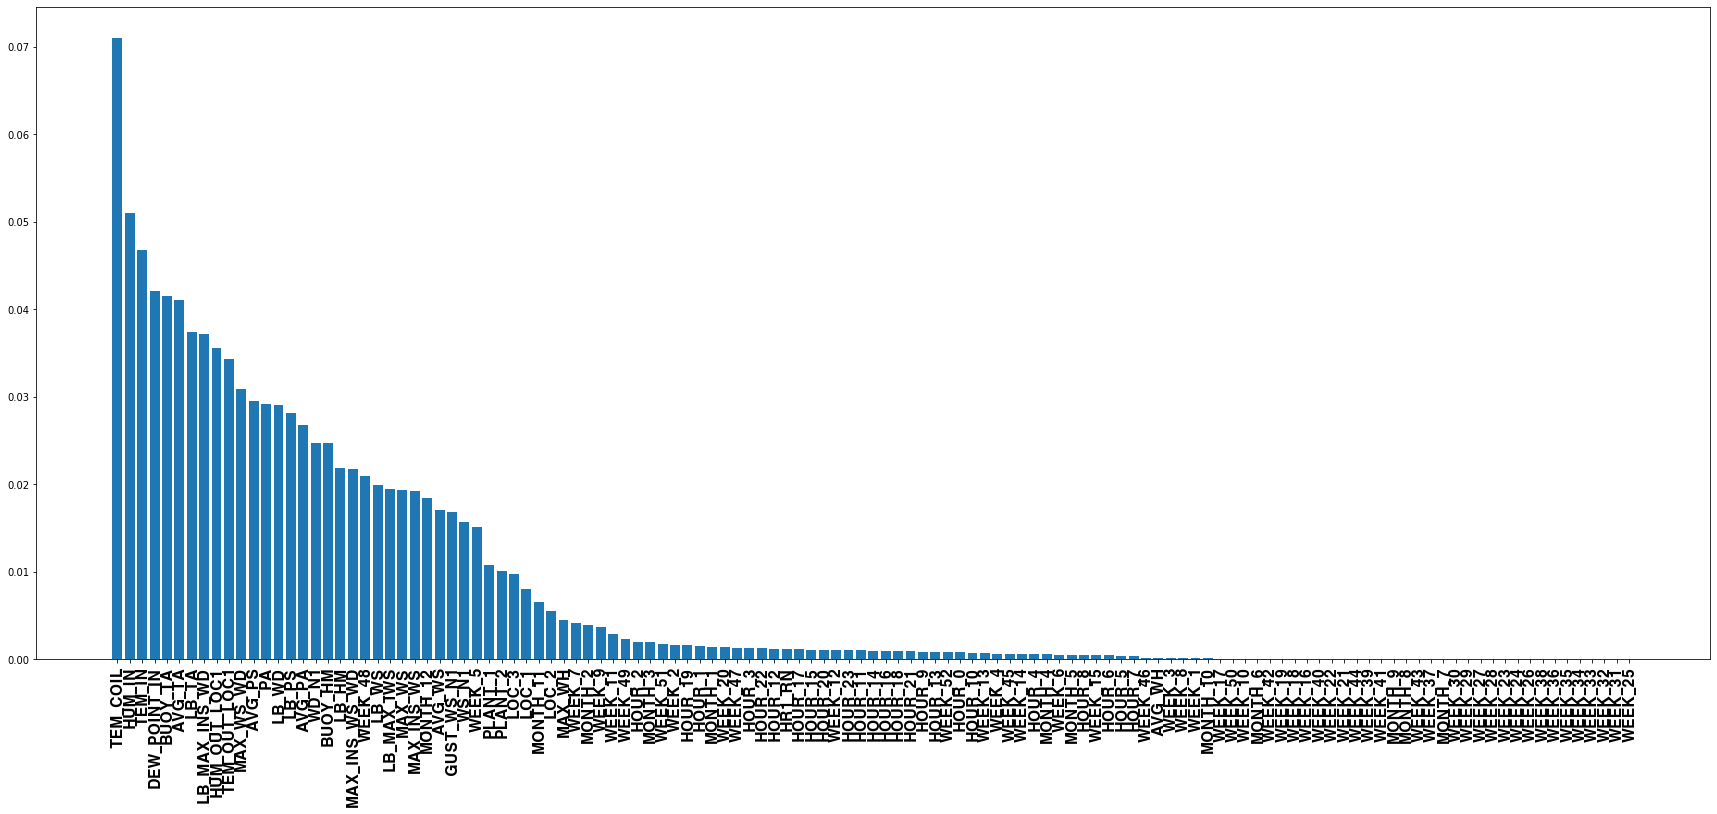

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
font_path = "C:/Windows/Fonts/H2GTRE.TTF"
font_prop = fm.FontProperties(fname=font_path, size=15)

plt.figure(figsize=(30,12))
plt.bar(imp_rf24_df.variable, imp_rf24_df.importance)
plt.xticks(rotation=90, fontproperties=font_prop)
plt.show()

## 48시간 결로 예측

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf_model48 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model48.fit(X_train48, y_train48)

C:\Users\B0110\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [19]:
y_pred48 = rf_model48.predict(X_val48)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred48))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104133
         1.0       0.92      0.74      0.82       604

    accuracy                           1.00    104737
   macro avg       0.96      0.87      0.91    104737
weighted avg       1.00      1.00      1.00    104737



떨어짐(precision 증가)

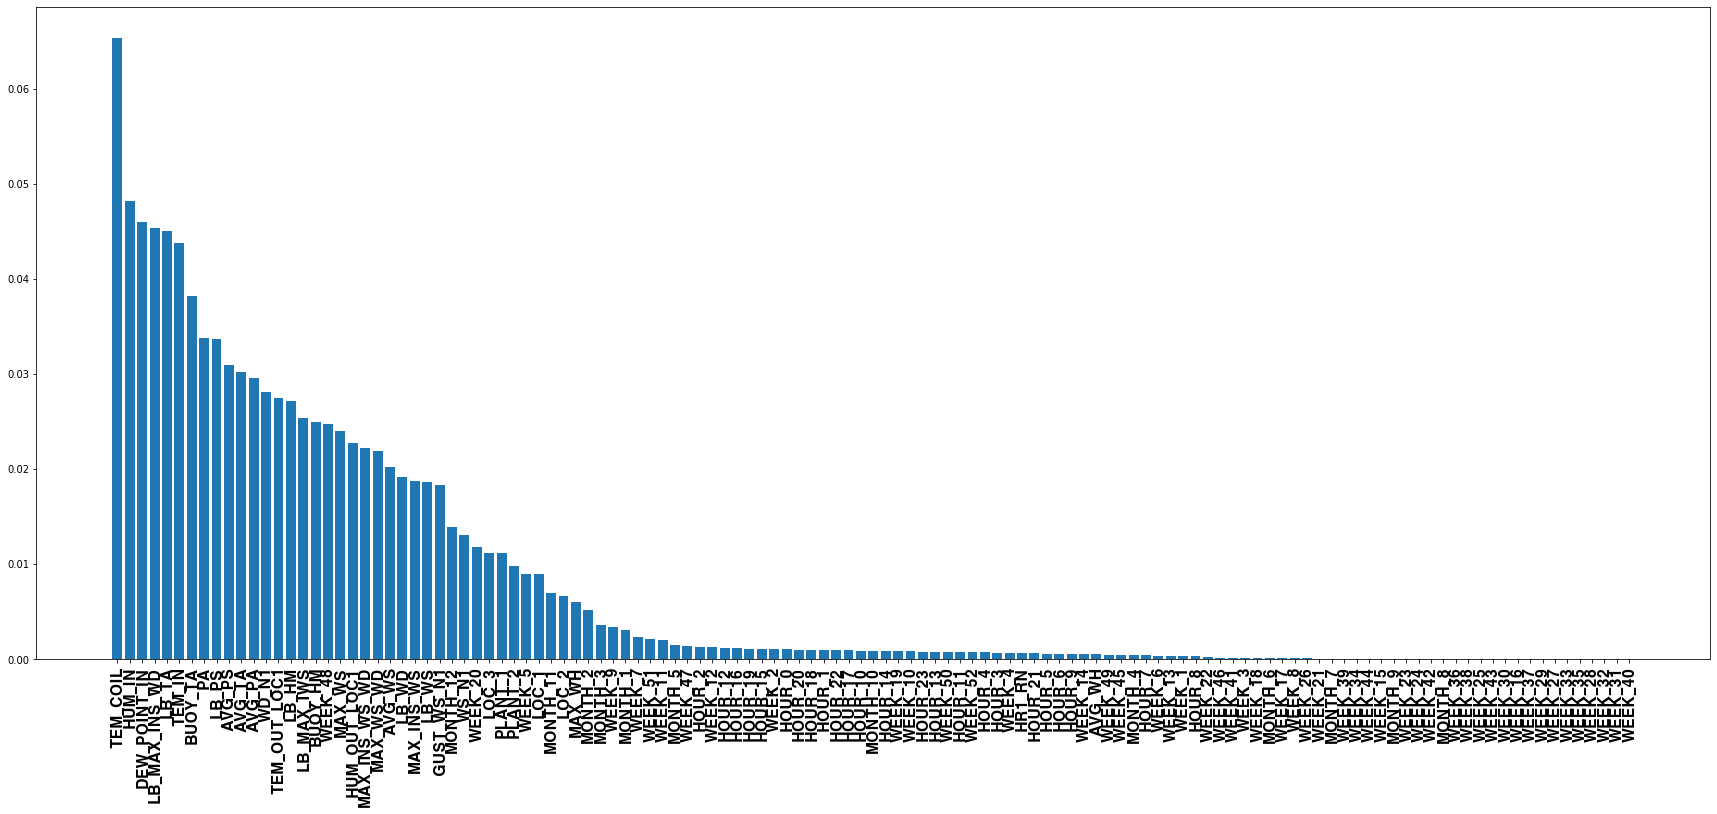

In [20]:
imp_rf48_df = pd.DataFrame(data=np.c_[train_X.columns.values, rf_model48.feature_importances_], columns=['variable', 'importance'])
imp_rf48_df.sort_values(by='importance', ascending=False, inplace=True)
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
font_path = "C:/Windows/Fonts/H2GTRE.TTF"
font_prop = fm.FontProperties(fname=font_path, size=15)

plt.figure(figsize=(30,12))
plt.bar(imp_rf48_df.variable, imp_rf48_df.importance)
plt.xticks(rotation=90, fontproperties=font_prop)
plt.show()

## 검증값 만들기

In [21]:
test

,X24H_COND_LOC,X48H_COND_LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,DEW_POINT_IN,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM,PLANT_1,PLANT_2,LOC_1,LOC_2,LOC_3,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12,WEEK_1,WEEK_2,WEEK_3,WEEK_4,WEEK_5,WEEK_6,WEEK_7,WEEK_8,WEEK_9,WEEK_10,WEEK_11,WEEK_12,WEEK_13,WEEK_14,WEEK_15,WEEK_16,WEEK_17,WEEK_18,WEEK_19,WEEK_20,WEEK_21,WEEK_22,WEEK_23,WEEK_24,WEEK_25,WEEK_26,WEEK_27,WEEK_28,WEEK_29,WEEK_30,WEEK_31,WEEK_32,WEEK_33,WEEK_34,WEEK_35,WEEK_36,WEEK_37,WEEK_38,WEEK_39,WEEK_40,WEEK_41,WEEK_42,WEEK_43,WEEK_44,WEEK_45,WEEK_46,WEEK_47,WEEK_48,WEEK_49,WEEK_50,WEEK_51,WEEK_52,HOUR_0,HOUR_1,HOUR_2,HOUR_3,HOUR_4,HOUR_5,HOUR_6,HOUR_7,HOUR_8,HOUR_9,HOUR_10,HOUR_11,HOUR_12,HOUR_13,HOUR_14,HOUR_15,HOUR_16,HOUR_17,HOUR_18,HOUR_19,HOUR_20,HOUR_21,HOUR_22,HOUR_23
0,NaN,NaN,-0.936761,-1.054636,-0.641253,-1.016510,-0.547359,-1.156985,0.719168,0.728424,-0.201451,-0.982463,0.193810,0.036838,1.217634,0.138219,1.473462,1.421462,1.080957,1.183797,0.735323,-1.467916,-0.912763,3.380703,-0.16337,0.963194,1.217574,1.039870,1.535735,-0.821423,0.687035,-1.459530,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,NaN,NaN,-0.720865,-0.449353,-0.562858,-0.817131,-0.319514,-0.722579,0.770127,0.774986,-0.201451,-0.787520,0.786256,0.619294,1.489210,0.775478,1.341007,1.513584,0.720434,0.723386,0.653443,-0.960107,-0.925726,1.467332,-0.16337,1.026285,0.963700,0.923601,0.243787,-0.821423,0.651951,-0.669360,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,NaN,NaN,-0.788188,-1.017843,-0.758277,-0.166248,-1.690616,-1.021676,0.821087,0.821548,-0.201451,-0.592578,1.378701,1.201750,1.760786,1.412737,1.208552,-1.572493,-0.361134,-0.513971,0.910781,-0.887563,-0.834982,1.467332,-0.16337,1.215556,0.093277,0.923601,0.243787,-0.776169,0.897540,-1.657072,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,NaN,NaN,-0.455058,-1.508418,-0.554905,-0.159918,-1.885695,-1.009317,0.872047,0.868110,-0.201451,-0.397635,1.971147,1.784207,2.032362,2.049996,1.076097,-1.425098,-0.721656,-0.715401,0.899084,-0.887563,-0.822018,1.467332,-0.16337,1.206543,-0.341934,0.923601,0.243787,-0.753542,0.885845,-1.722919,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,NaN,NaN,-0.575774,-2.336624,-0.793497,-0.192621,-2.310636,-1.650210,0.707408,0.705143,-0.201451,-0.369337,1.926714,1.824376,1.725850,1.925855,1.422885,0.831883,-0.721656,-0.513971,0.758718,-1.395372,-0.796091,-0.446039,-0.16337,0.323276,-0.414470,0.923601,0.243787,-0.696975,0.733814,-2.249699,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,NaN,NaN,-0.639614,-1.563968,-0.277684,-0.797087,-0.973308,-1.184008,0.636848,0.646940,-0.

In [22]:
validation = etl.makeValiation(test_data, rf_model24, rf_model48, test_X)
validation

C:\Users\B0110\module\etl.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC"] = predict24.astype(int)
C:\Users\B0110\module\etl.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC_PROB"] = (predict24_proba[:,1]*100).astype(int)
C:\Users\B0110\module\etl.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pan

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
0,2019-04-01 00:00:00,2,3,2019-04-02 00:00:00,0,0,2019-04-03 00:00:00,0,3
1,2019-04-01 04:30:00,1,2,2019-04-02 04:30:00,0,0,2019-04-03 04:30:00,0,2
2,2019-04-01 10:30:00,2,3,2019-04-02 10:30:00,0,1,2019-04-03 10:30:00,0,2
3,2019-04-01 11:00:00,1,1,2019-04-02 11:00:00,0,2,2019-04-03 11:00:00,0,4
4,2019-04-01 13:30:00,2,1,2019-04-02 13:30:00,0,2,2019-04-03 13:30:00,0,3
...,...,...,...,...,...,...,...,...,...
3534,2020-03-29 03:00:00,1,2,2020-03-30 03:00:00,0,0,2020-03-31 03:00:00,0,0
3535,2020-03-29 05:00:00,2,3,2020-03-30 05:00:00,0,0,2020-03-31 05:00:00,0,0
3536,2020-03-29 07:00:00,2,1,2020-03-30 07:00:00,0,0,2020-03-31 07:00:00,0,1
3537,2020-03-29 11:30:00,1,1,2020-03-30 11:30:00,0,0,2020-03-31 11:30:00,0,1


In [23]:
etl.findCondRow(validation)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB


In [24]:
etl.findCondRow(validation,48)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB


In [25]:
etl.findCondRow(validation,1)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB


## 파일 저장하기

In [26]:
etl.save_validation_csv(validation,"rforest")

# LightGBM
## 24시간 결로 예측

In [27]:
from lightgbm import LGBMClassifier
lgbm_model24 = LGBMClassifier(n_estimators=100, random_state=42, boost_from_average=False)
lgbm_model24.fit(X_train24, y_train24)

C:\Users\B0110\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\B0110\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier(boost_from_average=False, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, importance_type='split',
               learning_rate=0.1, max_depth=-1, min_child_samples=20,
               min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
               n_jobs=-1, num_leaves=31, objective=None, random_state=42,
               reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [28]:
y_pred24 = lgbm_model24.predict(X_val24)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred24))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104223
         1.0       0.93      0.81      0.87       514

    accuracy                           1.00    104737
   macro avg       0.97      0.90      0.93    104737
weighted avg       1.00      1.00      1.00    104737



In [91]:
from lightgbm import LGBMClassifier
lgbm_model24 = LGBMClassifier(n_estimators=1000, random_state=42, boost_from_average=False, max_depth=128, min_child_samples= 60, num_leaves =64,subsample=0.8 )
lgbm_model24.fit(X_resampled24, y_resampled24, early_stopping_rounds=100, eval_metric="auc",
           eval_set=[(X_resampled24, y_resampled24), (X_val, y_val24)])

lgbm_roc_score = roc_auc_score(y_val24, lgbm_model24.predict_proba(X_val)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

C:\Users\B0110\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\B0110\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	training's auc: 0.983373	training's binary_logloss: 0.607672	valid_1's auc: 0.976794	valid_1's binary_logloss: 0.607755
Training until validation scores don't improve for 100 rounds
[2]	training's auc: 0.98713	training's binary_logloss: 0.537437	valid_1's auc: 0.980156	valid_1's binary_logloss: 0.537783
[3]	training's auc: 0.987981	training's binary_logloss: 0.47904	valid_1's auc: 0.980488	valid_1's binary_logloss: 0.479651
[4]	training's auc: 0.988161	training's binary_logloss: 0.429184	valid_1's auc: 0.981478	valid_1's binary_logloss: 0.430274
[5]	training's auc: 0.989586	training's binary_logloss: 0.386499	valid_1's auc: 0.982769	valid_1's binary_logloss: 0.388156
[6]	training's auc: 0.989965	training's binary_logloss: 0.349281	valid_1's auc: 0.983022	valid_1's binary_logloss: 0.351438
[7]	training's auc: 0.992454	training's binary_logloss: 0.316366	valid_1's auc: 0.98599	valid_1's binary_logloss: 0.318781
[8]	training's auc: 0.992886	training's binary_logloss: 0.287784	valid_1'

[67]	training's auc: 0.999987	training's binary_logloss: 0.00755372	valid_1's auc: 0.997885	valid_1's binary_logloss: 0.0108924
[68]	training's auc: 0.999988	training's binary_logloss: 0.00720878	valid_1's auc: 0.997874	valid_1's binary_logloss: 0.0105294
[69]	training's auc: 0.999989	training's binary_logloss: 0.00694759	valid_1's auc: 0.997857	valid_1's binary_logloss: 0.0102512
[70]	training's auc: 0.999991	training's binary_logloss: 0.00659991	valid_1's auc: 0.997848	valid_1's binary_logloss: 0.00986054
[71]	training's auc: 0.999992	training's binary_logloss: 0.00630287	valid_1's auc: 0.997843	valid_1's binary_logloss: 0.00955056
[72]	training's auc: 0.999992	training's binary_logloss: 0.00609117	valid_1's auc: 0.997794	valid_1's binary_logloss: 0.00933257
[73]	training's auc: 0.999993	training's binary_logloss: 0.00584228	valid_1's auc: 0.997818	valid_1's binary_logloss: 0.00912098
[74]	training's auc: 0.999994	training's binary_logloss: 0.00559766	valid_1's auc: 0.997842	valid_1'

[133]	training's auc: 1	training's binary_logloss: 0.000803666	valid_1's auc: 0.998005	valid_1's binary_logloss: 0.00442012
[134]	training's auc: 1	training's binary_logloss: 0.000780848	valid_1's auc: 0.997969	valid_1's binary_logloss: 0.00440041
[135]	training's auc: 1	training's binary_logloss: 0.00076053	valid_1's auc: 0.997966	valid_1's binary_logloss: 0.00439026
[136]	training's auc: 1	training's binary_logloss: 0.000738772	valid_1's auc: 0.997957	valid_1's binary_logloss: 0.0043953
[137]	training's auc: 1	training's binary_logloss: 0.00072056	valid_1's auc: 0.998014	valid_1's binary_logloss: 0.00438622
[138]	training's auc: 1	training's binary_logloss: 0.000703378	valid_1's auc: 0.998047	valid_1's binary_logloss: 0.00438404
[139]	training's auc: 1	training's binary_logloss: 0.000684881	valid_1's auc: 0.998121	valid_1's binary_logloss: 0.00436452
[140]	training's auc: 1	training's binary_logloss: 0.00066815	valid_1's auc: 0.998157	valid_1's binary_logloss: 0.00434492
[141]	traini

[202]	training's auc: 1	training's binary_logloss: 0.000154729	valid_1's auc: 0.998164	valid_1's binary_logloss: 0.0043625
[203]	training's auc: 1	training's binary_logloss: 0.000151359	valid_1's auc: 0.998197	valid_1's binary_logloss: 0.00436867
[204]	training's auc: 1	training's binary_logloss: 0.000147848	valid_1's auc: 0.998147	valid_1's binary_logloss: 0.00437599
[205]	training's auc: 1	training's binary_logloss: 0.000144258	valid_1's auc: 0.998153	valid_1's binary_logloss: 0.00437591
[206]	training's auc: 1	training's binary_logloss: 0.000141145	valid_1's auc: 0.998143	valid_1's binary_logloss: 0.00438075
[207]	training's auc: 1	training's binary_logloss: 0.000137257	valid_1's auc: 0.998149	valid_1's binary_logloss: 0.00438391
[208]	training's auc: 1	training's binary_logloss: 0.00013487	valid_1's auc: 0.998185	valid_1's binary_logloss: 0.0043882
[209]	training's auc: 1	training's binary_logloss: 0.000131777	valid_1's auc: 0.998189	valid_1's binary_logloss: 0.00438106
[210]	train

ROC AUC: 0.9981


In [92]:
y_pred24 = lgbm_model24.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred24))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104202
         1.0       0.87      0.89      0.88       535

    accuracy                           1.00    104737
   macro avg       0.94      0.94      0.94    104737
weighted avg       1.00      1.00      1.00    104737



precision 증가, recall 감소, fi 증가

## 48시간 결로 예측

In [29]:
from lightgbm import LGBMClassifier
lgbm_model48 = LGBMClassifier(n_estimators=100, random_state=42, boost_from_average=False)
lgbm_model48.fit(X_train48, y_train48)

LGBMClassifier(boost_from_average=False, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, importance_type='split',
               learning_rate=0.1, max_depth=-1, min_child_samples=20,
               min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
               n_jobs=-1, num_leaves=31, objective=None, random_state=42,
               reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [30]:
y_pred48 = lgbm_model48.predict(X_val48)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred48))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104133
         1.0       0.89      0.78      0.83       604

    accuracy                           1.00    104737
   macro avg       0.94      0.89      0.91    104737
weighted avg       1.00      1.00      1.00    104737



In [93]:
from lightgbm import LGBMClassifier
lgbm_model48 = LGBMClassifier(n_estimators=1000, random_state=42, boost_from_average=False, max_depth=128, min_child_samples= 60, num_leaves =64,subsample=0.8 )
lgbm_model48.fit(X_resampled48, y_resampled48, early_stopping_rounds=100, eval_metric="auc",
           eval_set=[(X_resampled48, y_resampled48), (X_val, y_val48)])

lgbm_roc_score = roc_auc_score(y_val48, lgbm_model48.predict_proba(X_val)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

C:\Users\B0110\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\B0110\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	training's auc: 0.983398	training's binary_logloss: 0.60906	valid_1's auc: 0.968	valid_1's binary_logloss: 0.609083
Training until validation scores don't improve for 100 rounds
[2]	training's auc: 0.983946	training's binary_logloss: 0.540052	valid_1's auc: 0.970095	valid_1's binary_logloss: 0.540137
[3]	training's auc: 0.98701	training's binary_logloss: 0.481477	valid_1's auc: 0.979813	valid_1's binary_logloss: 0.481469
[4]	training's auc: 0.98755	training's binary_logloss: 0.43204	valid_1's auc: 0.981667	valid_1's binary_logloss: 0.432067
[5]	training's auc: 0.992079	training's binary_logloss: 0.389614	valid_1's auc: 0.988188	valid_1's binary_logloss: 0.389511
[6]	training's auc: 0.992494	training's binary_logloss: 0.353276	valid_1's auc: 0.988438	valid_1's binary_logloss: 0.353075
[7]	training's auc: 0.99277	training's binary_logloss: 0.321748	valid_1's auc: 0.988898	valid_1's binary_logloss: 0.321469
[8]	training's auc: 0.992893	training's binary_logloss: 0.293775	valid_1's auc

[68]	training's auc: 0.999971	training's binary_logloss: 0.0103774	valid_1's auc: 0.997846	valid_1's binary_logloss: 0.0128828
[69]	training's auc: 0.999972	training's binary_logloss: 0.0100171	valid_1's auc: 0.997809	valid_1's binary_logloss: 0.0125329
[70]	training's auc: 0.999973	training's binary_logloss: 0.00961703	valid_1's auc: 0.997904	valid_1's binary_logloss: 0.0121122
[71]	training's auc: 0.999974	training's binary_logloss: 0.00932261	valid_1's auc: 0.997922	valid_1's binary_logloss: 0.0118194
[72]	training's auc: 0.999976	training's binary_logloss: 0.00900198	valid_1's auc: 0.997913	valid_1's binary_logloss: 0.0114796
[73]	training's auc: 0.999977	training's binary_logloss: 0.00871071	valid_1's auc: 0.997968	valid_1's binary_logloss: 0.011192
[74]	training's auc: 0.999978	training's binary_logloss: 0.00841504	valid_1's auc: 0.997965	valid_1's binary_logloss: 0.0108911
[75]	training's auc: 0.999979	training's binary_logloss: 0.00809681	valid_1's auc: 0.998024	valid_1's binar

[133]	training's auc: 1	training's binary_logloss: 0.00151228	valid_1's auc: 0.998512	valid_1's binary_logloss: 0.00418548
[134]	training's auc: 1	training's binary_logloss: 0.0014758	valid_1's auc: 0.998479	valid_1's binary_logloss: 0.00416274
[135]	training's auc: 1	training's binary_logloss: 0.00144314	valid_1's auc: 0.998444	valid_1's binary_logloss: 0.0041378
[136]	training's auc: 1	training's binary_logloss: 0.00140683	valid_1's auc: 0.998464	valid_1's binary_logloss: 0.00410957
[137]	training's auc: 1	training's binary_logloss: 0.00137534	valid_1's auc: 0.998433	valid_1's binary_logloss: 0.0040925
[138]	training's auc: 1	training's binary_logloss: 0.00134517	valid_1's auc: 0.998473	valid_1's binary_logloss: 0.00406374
[139]	training's auc: 1	training's binary_logloss: 0.00131842	valid_1's auc: 0.998437	valid_1's binary_logloss: 0.00404597
[140]	training's auc: 1	training's binary_logloss: 0.00128885	valid_1's auc: 0.998421	valid_1's binary_logloss: 0.00402408
[141]	training's au

[201]	training's auc: 1	training's binary_logloss: 0.00036144	valid_1's auc: 0.99836	valid_1's binary_logloss: 0.00353833
[202]	training's auc: 1	training's binary_logloss: 0.000354605	valid_1's auc: 0.998356	valid_1's binary_logloss: 0.00353852
[203]	training's auc: 1	training's binary_logloss: 0.000348231	valid_1's auc: 0.998343	valid_1's binary_logloss: 0.00354077
[204]	training's auc: 1	training's binary_logloss: 0.000341768	valid_1's auc: 0.99836	valid_1's binary_logloss: 0.00353939
[205]	training's auc: 1	training's binary_logloss: 0.000335755	valid_1's auc: 0.998357	valid_1's binary_logloss: 0.00353889
[206]	training's auc: 1	training's binary_logloss: 0.000329951	valid_1's auc: 0.998347	valid_1's binary_logloss: 0.00354243
[207]	training's auc: 1	training's binary_logloss: 0.00032368	valid_1's auc: 0.998337	valid_1's binary_logloss: 0.0035464
[208]	training's auc: 1	training's binary_logloss: 0.000318268	valid_1's auc: 0.998352	valid_1's binary_logloss: 0.00354414
[209]	trainin

In [94]:
y_pred48 = lgbm_model48.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred48))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104150
         1.0       0.85      0.93      0.89       587

    accuracy                           1.00    104737
   macro avg       0.93      0.96      0.94    104737
weighted avg       1.00      1.00      1.00    104737



떨어짐

## 검증값 만들기

In [95]:
lgValiation =etl.makeValiation(test_data,lgbm_model24,lgbm_model48, test_X)
lgValiation

C:\Users\B0110\module\etl.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC"] = predict24.astype(int)
C:\Users\B0110\module\etl.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC_PROB"] = (predict24_proba[:,1]*100).astype(int)
C:\Users\B0110\module\etl.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pan

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
0,2019-04-01 00:00:00,2,3,2019-04-02 00:00:00,0,0,2019-04-03 00:00:00,0,0
1,2019-04-01 04:30:00,1,2,2019-04-02 04:30:00,0,0,2019-04-03 04:30:00,0,1
2,2019-04-01 10:30:00,2,3,2019-04-02 10:30:00,0,0,2019-04-03 10:30:00,0,1
3,2019-04-01 11:00:00,1,1,2019-04-02 11:00:00,0,0,2019-04-03 11:00:00,0,0
4,2019-04-01 13:30:00,2,1,2019-04-02 13:30:00,0,0,2019-04-03 13:30:00,0,18
...,...,...,...,...,...,...,...,...,...
3534,2020-03-29 03:00:00,1,2,2020-03-30 03:00:00,0,0,2020-03-31 03:00:00,0,0
3535,2020-03-29 05:00:00,2,3,2020-03-30 05:00:00,0,0,2020-03-31 05:00:00,0,0
3536,2020-03-29 07:00:00,2,1,2020-03-30 07:00:00,0,0,2020-03-31 07:00:00,0,0
3537,2020-03-29 11:30:00,1,1,2020-03-30 11:30:00,0,0,2020-03-31 11:30:00,0,0


In [96]:
etl.findCondRow(lgValiation)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
2081,2019-11-23 15:00:00,1,2,2019-11-24 15:00:00,1,82,2019-11-25 15:00:00,0,2
2090,2019-11-23 16:30:00,1,2,2019-11-24 16:30:00,1,75,2019-11-25 16:30:00,0,2
2092,2019-11-23 17:00:00,1,2,2019-11-24 17:00:00,1,94,2019-11-25 17:00:00,0,2
2225,2019-12-09 12:00:00,1,3,2019-12-10 12:00:00,1,52,2019-12-11 12:00:00,0,1
2232,2019-12-09 13:30:00,1,3,2019-12-10 13:30:00,1,50,2019-12-11 13:30:00,0,0
...,...,...,...,...,...,...,...,...,...
3174,2020-02-21 09:00:00,1,3,2020-02-22 09:00:00,1,68,2020-02-23 09:00:00,0,11
3176,2020-02-21 11:30:00,1,3,2020-02-22 11:30:00,1,70,2020-02-23 11:30:00,0,8
3177,2020-02-21 13:30:00,1,1,2020-02-22 13:30:00,1,64,2020-02-23 13:30:00,0,0
3209,2020-02-25 00:30:00,1,3,2020-02-26 00:30:00,1,97,2020-02-27 00:30:00,0,4


In [97]:
etl.findCondRow(lgValiation,48)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
27,2019-04-03 12:30:00,1,3,2019-04-04 12:30:00,0,0,2019-04-05 12:30:00,1,76
411,2019-05-14 09:30:00,1,3,2019-05-15 09:30:00,0,19,2019-05-16 09:30:00,1,55
431,2019-05-16 06:00:00,1,2,2019-05-17 06:00:00,0,0,2019-05-18 06:00:00,1,65
2318,2019-12-15 11:00:00,1,3,2019-12-16 11:00:00,0,49,2019-12-17 11:00:00,1,68
2322,2019-12-15 11:30:00,1,3,2019-12-16 11:30:00,0,12,2019-12-17 11:30:00,1,60
2327,2019-12-15 12:00:00,1,3,2019-12-16 12:00:00,0,1,2019-12-17 12:00:00,1,66
2331,2019-12-15 12:30:00,1,3,2019-12-16 12:30:00,0,1,2019-12-17 12:30:00,1,66
2335,2019-12-15 13:00:00,1,3,2019-12-16 13:00:00,0,1,2019-12-17 13:00:00,1,66
2346,2019-12-16 09:30:00,1,2,2019-12-17 09:30:00,1,93,2019-12-18 09:30:00,1,96
2350,2019-12-16 10:00:00,1,2,2019-12-17 10:00:00,1,99,2019-12-18 10:00:00,1,86


In [98]:
etl.findCondRow(lgValiation,1)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
2346,2019-12-16 09:30:00,1,2,2019-12-17 09:30:00,1,93,2019-12-18 09:30:00,1,96
2350,2019-12-16 10:00:00,1,2,2019-12-17 10:00:00,1,99,2019-12-18 10:00:00,1,86
2352,2019-12-16 10:00:00,1,3,2019-12-17 10:00:00,1,99,2019-12-18 10:00:00,1,95
2355,2019-12-16 10:30:00,1,2,2019-12-17 10:30:00,1,99,2019-12-18 10:30:00,1,94
2357,2019-12-16 10:30:00,1,3,2019-12-17 10:30:00,1,99,2019-12-18 10:30:00,1,97
2358,2019-12-16 11:00:00,1,1,2019-12-17 11:00:00,1,85,2019-12-18 11:00:00,1,52
2361,2019-12-16 11:00:00,1,3,2019-12-17 11:00:00,1,99,2019-12-18 11:00:00,1,98
2363,2019-12-16 11:30:00,1,2,2019-12-17 11:30:00,1,98,2019-12-18 11:30:00,1,68
2365,2019-12-16 11:30:00,1,3,2019-12-17 11:30:00,1,98,2019-12-18 11:30:00,1,86
2368,2019-12-16 12:00:00,1,2,2019-12-17 12:00:00,1,97,2019-12-18 12:00:00,1,69


## 파일 저장하기

In [99]:
etl.save_validation_csv(lgValiation,"lgbm")

# XGBOOST
## 24시간 결로 예측

In [36]:
from xgboost import XGBClassifier
xgb_model24 = XGBClassifier(max_depth=10, learning_rate=0.01, n_estimators=100, random_state=42)
xgb_model24.fit(X_train24, y_train24)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [37]:
y_pred24 = xgb_model24.predict(X_val24)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred24))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104223
         1.0       0.94      0.59      0.72       514

    accuracy                           1.00    104737
   macro avg       0.97      0.79      0.86    104737
weighted avg       1.00      1.00      1.00    104737



precision 증가, 나머지 감소

## 48시간 결로 예측

In [38]:
from xgboost import XGBClassifier
xgb_model48 = XGBClassifier(max_depth=10, learning_rate=0.01, n_estimators=100, random_state=42)
xgb_model48.fit(X_train48, y_train48)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [39]:
y_pred48 = xgb_model48.predict(X_val48)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred48))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104133
         1.0       0.96      0.61      0.74       604

    accuracy                           1.00    104737
   macro avg       0.98      0.80      0.87    104737
weighted avg       1.00      1.00      1.00    104737



향상됨

## 검증 값 만들기

In [40]:
xgValiation=etl.makeValiation(test_data,xgb_model24,xgb_model48,test_X)
xgValiation

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
0,2019-04-01 00:00:00,2,3,2019-04-02 00:00:00,0,18,2019-04-03 00:00:00,0,18
1,2019-04-01 04:30:00,1,2,2019-04-02 04:30:00,0,18,2019-04-03 04:30:00,0,18
2,2019-04-01 10:30:00,2,3,2019-04-02 10:30:00,0,18,2019-04-03 10:30:00,0,18
3,2019-04-01 11:00:00,1,1,2019-04-02 11:00:00,0,18,2019-04-03 11:00:00,0,20
4,2019-04-01 13:30:00,2,1,2019-04-02 13:30:00,0,18,2019-04-03 13:30:00,0,18
...,...,...,...,...,...,...,...,...,...
3534,2020-03-29 03:00:00,1,2,2020-03-30 03:00:00,0,18,2020-03-31 03:00:00,0,18
3535,2020-03-29 05:00:00,2,3,2020-03-30 05:00:00,0,18,2020-03-31 05:00:00,0,18
3536,2020-03-29 07:00:00,2,1,2020-03-30 07:00:00,0,18,2020-03-31 07:00:00,0,18
3537,2020-03-29 11:30:00,1,1,2020-03-30 11:30:00,0,18,2020-03-31 11:30:00,0,18


In [41]:
etl.findCondRow(xgValiation)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
3032,2020-02-11 19:30:00,2,1,2020-02-12 19:30:00,1,54,2020-02-13 19:30:00,0,18
3033,2020-02-11 19:30:00,1,2,2020-02-12 19:30:00,1,54,2020-02-13 19:30:00,0,18
3034,2020-02-11 19:30:00,2,2,2020-02-12 19:30:00,1,54,2020-02-13 19:30:00,0,18
3040,2020-02-11 21:00:00,2,1,2020-02-12 21:00:00,1,54,2020-02-13 21:00:00,0,18
3041,2020-02-11 21:00:00,1,2,2020-02-12 21:00:00,1,54,2020-02-13 21:00:00,0,18
3042,2020-02-11 21:00:00,2,2,2020-02-12 21:00:00,1,54,2020-02-13 21:00:00,0,18
3043,2020-02-11 21:00:00,1,3,2020-02-12 21:00:00,1,53,2020-02-13 21:00:00,0,18
3044,2020-02-11 22:00:00,1,3,2020-02-12 22:00:00,1,53,2020-02-13 22:00:00,0,18
3046,2020-02-11 22:30:00,1,3,2020-02-12 22:30:00,1,53,2020-02-13 22:30:00,0,18
3047,2020-02-11 23:30:00,2,1,2020-02-12 23:30:00,1,53,2020-02-13 23:30:00,0,18


In [42]:
etl.findCondRow(xgValiation,48)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB


In [43]:
etl.findCondRow(xgValiation,1)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB


## 파일 저장하기

In [44]:
etl.save_validation_csv(xgValiation,"xgboost")

# KNN
## 24시간 결로 예측

In [45]:
from sklearn.neighbors import KNeighborsClassifier
neigh24 = KNeighborsClassifier(n_neighbors=3)
neigh24.fit(X_train24, y_train24)

C:\Users\B0110\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [46]:
y_pred24 = neigh24.predict(X_val24)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred24))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104223
         1.0       0.85      0.81      0.83       514

    accuracy                           1.00    104737
   macro avg       0.93      0.90      0.92    104737
weighted avg       1.00      1.00      1.00    104737



향상

## 48시간 결로 예측

In [47]:
from sklearn.neighbors import KNeighborsClassifier
neigh48 = KNeighborsClassifier(n_neighbors=3)
neigh48.fit(X_train48, y_train48)

C:\Users\B0110\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [48]:
y_pred48 = neigh48.predict(X_val48)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred48))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104133
         1.0       0.87      0.78      0.82       604

    accuracy                           1.00    104737
   macro avg       0.93      0.89      0.91    104737
weighted avg       1.00      1.00      1.00    104737



precision 증가, recall 감소, fi 증가

## 검증값 만들기

In [49]:
knnValiation=etl.makeValiation(test_data,neigh24,neigh48,test_X)
knnValiation

C:\Users\B0110\module\etl.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC"] = predict24.astype(int)
C:\Users\B0110\module\etl.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC_PROB"] = (predict24_proba[:,1]*100).astype(int)
C:\Users\B0110\module\etl.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pan

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
0,2019-04-01 00:00:00,2,3,2019-04-02 00:00:00,0,0,2019-04-03 00:00:00,0,0
1,2019-04-01 04:30:00,1,2,2019-04-02 04:30:00,0,0,2019-04-03 04:30:00,0,0
2,2019-04-01 10:30:00,2,3,2019-04-02 10:30:00,0,0,2019-04-03 10:30:00,0,0
3,2019-04-01 11:00:00,1,1,2019-04-02 11:00:00,0,0,2019-04-03 11:00:00,0,0
4,2019-04-01 13:30:00,2,1,2019-04-02 13:30:00,0,0,2019-04-03 13:30:00,0,0
...,...,...,...,...,...,...,...,...,...
3534,2020-03-29 03:00:00,1,2,2020-03-30 03:00:00,0,0,2020-03-31 03:00:00,0,0
3535,2020-03-29 05:00:00,2,3,2020-03-30 05:00:00,0,0,2020-03-31 05:00:00,0,0
3536,2020-03-29 07:00:00,2,1,2020-03-30 07:00:00,0,0,2020-03-31 07:00:00,0,0
3537,2020-03-29 11:30:00,1,1,2020-03-30 11:30:00,0,0,2020-03-31 11:30:00,0,0


In [50]:
etl.findCondRow(knnValiation)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
2092,2019-11-23 17:00:00,1,2,2019-11-24 17:00:00,1,66,2019-11-25 17:00:00,0,0
2228,2019-12-09 12:30:00,1,3,2019-12-10 12:30:00,1,100,2019-12-11 12:30:00,0,0
2232,2019-12-09 13:30:00,1,3,2019-12-10 13:30:00,1,66,2019-12-11 13:30:00,0,0
2353,2019-12-16 10:30:00,1,1,2019-12-17 10:30:00,1,66,2019-12-18 10:30:00,0,0
2355,2019-12-16 10:30:00,1,2,2019-12-17 10:30:00,1,66,2019-12-18 10:30:00,0,0
2357,2019-12-16 10:30:00,1,3,2019-12-17 10:30:00,1,100,2019-12-18 10:30:00,0,33
2358,2019-12-16 11:00:00,1,1,2019-12-17 11:00:00,1,100,2019-12-18 11:00:00,0,0
2359,2019-12-16 11:00:00,2,1,2019-12-17 11:00:00,1,100,2019-12-18 11:00:00,0,0
2360,2019-12-16 11:00:00,2,2,2019-12-17 11:00:00,1,100,2019-12-18 11:00:00,0,0
2361,2019-12-16 11:00:00,1,3,2019-12-17 11:00:00,1,100,2019-12-18 11:00:00,0,0


In [51]:
etl.findCondRow(knnValiation,48)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
99,2019-04-10 13:00:00,1,3,2019-04-11 13:00:00,0,0,2019-04-12 13:00:00,1,66
2030,2019-11-18 22:00:00,1,3,2019-11-19 22:00:00,0,0,2019-11-20 22:00:00,1,66
2110,2019-11-26 15:30:00,1,3,2019-11-27 15:30:00,0,0,2019-11-28 15:30:00,1,100
2315,2019-12-15 11:00:00,1,1,2019-12-16 11:00:00,0,0,2019-12-17 11:00:00,1,66
2319,2019-12-15 11:30:00,1,1,2019-12-16 11:30:00,0,0,2019-12-17 11:30:00,1,66
2320,2019-12-15 11:30:00,1,2,2019-12-16 11:30:00,0,0,2019-12-17 11:30:00,1,100
2321,2019-12-15 11:30:00,2,2,2019-12-16 11:30:00,0,0,2019-12-17 11:30:00,1,100
2322,2019-12-15 11:30:00,1,3,2019-12-16 11:30:00,0,0,2019-12-17 11:30:00,1,100
2323,2019-12-15 12:00:00,1,1,2019-12-16 12:00:00,0,0,2019-12-17 12:00:00,1,100
2324,2019-12-15 12:00:00,2,1,2019-12-16 12:00:00,0,0,2019-12-17 12:00:00,1,66


In [52]:
etl.findCondRow(knnValiation,1)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB


## 파일 저장하기

In [53]:
etl.save_validation_csv(xgValiation,"knn")